### 🧠 1. Problem Statement

#### 🎯 Primary Objective: 
- To build a predictive model that can determine whether a hotel reservation will be canceled or not, using guest-related booking features. This can help hotel management minimize revenue loss from last-minute cancellations and optimize room allocation strategies.


- Given a set of reservation details such as guest count, stay duration, lead time, room type, booking source, and booking history, predict whether a reservation will be canceled (booking_status).

`Target Variable`: `booking_status`

`Type`: `Binary classification` (`Canceled` / `Not_Canceled`)

`Use Case`: Improve occupancy planning, `reduce overbooking risks`, and `increase operational efficiency`.

In [322]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

### 2. Data Collection

In [323]:
df = pd.read_csv("/Users/user/Desktop/Hotel-Reservation-System/notebook/train.csv").reset_index()
df.head()

,index,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,...,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,...,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,...,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,...,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,...,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,...,2018,6,15,Offline,0,0,0,130.00,0,Canceled


#### 📑 `Feature Descriptions – Hotel Reservation Dataset`

Below is a detailed explanation of each column present in the hotel reservation dataset. Understanding these features is crucial for building robust data preprocessing pipelines and predictive models.

- `🆔 Booking_ID`: A unique identifier assigned to each booking. It is useful for tracking individual reservations but does not carry predictive power by itself.

- `👨‍👩‍👧‍👦 no_of_adults`: The number of adult guests included in the reservation. This helps in estimating room requirements and guest load.

- `🧒 no_of_children`: The number of children accompanying the adults. Together with the adult count, it determines the total party size.

- `🌙 no_of_weekend_nights`: The number of weekend nights (typically Saturday and Sunday) included in the stay. Useful for demand forecasting and price optimization.

- `🛌 no_of_week_nights`: The number of weekdays the guest plans to stay. Combined with weekend nights, it gives the total duration of the stay.

- `🍽️ type_of_meal_plan`: The meal plan selected by the guest (e.g., Breakfast only, Full board). This can reflect guest preferences or budget.

- `🚗 required_car_parking_space`: A binary feature indicating whether the guest requested parking for a private vehicle. Often correlated with family or longer stays.

- `🛏️ room_type_reserved`: The type of room reserved, such as deluxe, standard, or family suite. Important for understanding preferences and inventory management.

- `📅 lead_time`: The number of days between the booking date and the arrival date. Longer lead times may be associated with more cancellations or bulk bookings.

- `📆 arrival_year`: The calendar year in which the guest is scheduled to arrive. Useful for trend analysis or tracking seasonal performance.

- `📆 arrival_month`: The month of guest arrival. Helps identify peak seasons or off-season trends in reservations.

- `💻 market_segment_type`: Describes the source of the booking, such as online platforms, travel agents, corporate bookings, or direct walk-ins. It is crucial for marketing and channel performance analysis.

- `🔁 repeated_guest`: A binary flag indicating whether the guest has booked before (1 = repeated, 0 = first-time). This is a strong indicator of loyalty.

- `❌ no_of_previous_cancellations`: The count of past reservations that were cancelled by the same guest. This could be useful in predicting future cancellations.

- `✅ no_of_previous_bookings_not_cancelled`: Number of previous successful bookings (i.e., not cancelled). Could be a positive indicator of trustworthiness.

- `🙋 no_of_special_requests`: Total number of special requests made by the guest (e.g., late check-in, extra bed). May reflect guest satisfaction and expectations.

- `📌 booking_status (Target Variable)`
The final status of the booking:

    `Canceled`: Booking was made but later canceled.

    `Not_Canceled`: Guest honored the booking and stayed.

    This is the target variable for predictive modeling.


In [324]:
# shape of the dataset. (rows, columns)
print(f"Dataset contains {df.shape[0]:,} rows and {df.shape[1]} columns.\n")

Dataset contains 29,020 rows and 21 columns.



In [325]:
# List all the columns names. 
print("Column names: ")
print(df.columns.tolist())
print()

Column names: 
['index', 'Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'booking_status']



In [326]:
# Get the Information about the dataframe. \
print("\nDataFrame Info:")
df.info()
print()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29020 entries, 0 to 29019
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   index                                 29020 non-null  int64  
 1   Unnamed: 0                            29020 non-null  int64  
 2   Booking_ID                            29020 non-null  object 
 3   no_of_adults                          29020 non-null  int64  
 4   no_of_children                        29020 non-null  int64  
 5   no_of_weekend_nights                  29020 non-null  int64  
 6   no_of_week_nights                     29020 non-null  int64  
 7   type_of_meal_plan                     29020 non-null  object 
 8   required_car_parking_space            29020 non-null  int64  
 9   room_type_reserved                    29020 non-null  object 
 10  lead_time                             29020 non-null  int64  
 11

In [327]:
# Describe object (categorical) columns.
print("\nSummary Statistics for Categorical Columns:")
display(df.describe(include='object'))


Summary Statistics for Categorical Columns:


,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,29020,29020,29020,29020,29020
unique,29020,4,7,5,2
top,INN25630,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,1,22274,22489,18550,19551


In [328]:
# Dropping the Unncessary Columns like `Unnamed: 0` and `Booking_ID`
df.drop(columns=['Unnamed: 0', 'Booking_ID'], inplace=True)

In [329]:
df.head()

,index,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [330]:
df.describe()

,index,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000
mean,14509.500000,1.844280,0.106306,0.807822,2.202068,0.031943,85.376085,2017.820434,7.416506,15.598725,0.025775,0.023880,0.154721,103.501785,0.619917
std,8377.496742,0.518692,0.405391,0.868111,1.402801,0.175853,85.859070,0.383832,3.060058,8.740151,0.158467,0.375994,1.777787,35.137794,0.786348
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7254.750000,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.500000,0.000000
50%,14509.500000,2.000000,0.000000,1.000000,2.000000,0.000000,58.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.850000,0.000000
75%,21764.250000,2.000000,0.000000,2.000000,3.000000,0.000000,127.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.120000,1.000000
max,29019.000000,4.000000,10.000000,6.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,375.500000,5.000000


### 3. Data Cleaning and Preprocessing. 

    a. Handle missing values
    b. Remove duplicates
    c. Fix inconsistencies (e.g., units, encodings)
    d. Convert data types
    e. Deal with outliers

In [331]:
# checking null values if present in the datasets or not. 
df.isnull().sum()

index                                   0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

since dataset does not contains any null values. so, good to go. 

In [332]:
# Checking duplicates values. 
df.duplicated().sum()

np.int64(0)

In [333]:
df.shape

(29020, 19)

In [334]:
df['no_of_adults'].value_counts()

no_of_adults
2    20896
1     6154
3     1841
0      116
4       13
Name: count, dtype: int64

`no_of_adults`: The number of adults per booking, where most bookings are for 2 adults (20,896), followed by 1 adult (6,154), and fewer bookings with 3 or more adults.

In [335]:
df['no_of_children'].value_counts()

no_of_children
0     26837
1      1315
2       853
3        12
9         2
10        1
Name: count, dtype: int64

`no_of_children`: Most bookings have no children (26,837), with fewer bookings including 1 or 2 children, and very rare cases with more than 3 children. It also indicates that hotel is doing `couple booking` mostly, family booking are less.

In [336]:
# Number of weekend nights. 
df['no_of_weekend_nights'].value_counts()

no_of_weekend_nights
0    13537
1     7981
2     7238
3      126
4       96
5       28
6       14
Name: count, dtype: int64

`no_of_weekend_nights`: Most bookings include zero weekend nights (13,537), while a large number have 1 or 2 weekend nights, and very few bookings span more than 3 weekend nights.

In [337]:
# Number of week nights. 
df['no_of_week_nights'].value_counts()

no_of_week_nights
2     9110
1     7627
3     6277
4     2396
0     1904
5     1314
6      147
7       88
10      49
8       43
9       27
11      12
15       7
12       6
14       5
13       4
16       2
17       2
Name: count, dtype: int64

`no_of_week_nights`: Most bookings are for 2 weeknights (9,110), followed by 1 and 3 weeknights, with progressively fewer bookings for longer stays.

In [338]:
df['type_of_meal_plan'].value_counts()

type_of_meal_plan
Meal Plan 1     22274
Not Selected     4085
Meal Plan 2      2657
Meal Plan 3         4
Name: count, dtype: int64

`type_of_meal_plan`: Most guests choose Meal Plan 1 (22,274), some don’t select any meal plan (4,085), while fewer opt for Meal Plan 2 (2,657) or Meal Plan 3 (4).

In [339]:
df['required_car_parking_space'].value_counts()

required_car_parking_space
0    28093
1      927
Name: count, dtype: int64

`required_car_parking_space`: The vast majority of bookings (28,093) do not require car parking, while a small portion (927) request parking space.

In [340]:
df['room_type_reserved'].value_counts()

room_type_reserved
Room_Type 1    22489
Room_Type 4     4841
Room_Type 6      773
Room_Type 2      567
Room_Type 5      214
Room_Type 7      131
Room_Type 3        5
Name: count, dtype: int64

`room_type_reserved`: Most guests reserve Room Type 1 (22,489), typically small rooms suitable for couples or solo travelers; Room Type 4 (4,841) may be larger rooms for families, while other types are less common.

In [341]:
df['arrival_year'].value_counts()

arrival_year
2018    23809
2017     5211
Name: count, dtype: int64

`arrival_year`: Most bookings are for arrivals in 2018 (23,809), with fewer in 2017 (5,211), reflecting the dataset’s time span and recent trends.

In [342]:
df['arrival_month'].value_counts()

arrival_month
10    4263
9     3704
8     3038
6     2589
11    2377
7     2367
12    2360
4     2211
5     2089
3     1857
2     1362
1      803
Name: count, dtype: int64

`arrival_month`: Bookings peak in October (4,263) and September (3,704), indicating higher demand in early fall, while January (803) sees the fewest arrivals.

In [343]:
df['market_segment_type'].value_counts()

market_segment_type
Online           18550
Offline           8430
Corporate         1632
Complementary      312
Aviation            96
Name: count, dtype: int64

`market_segment_type`: Most bookings come through Online channels (18,550), followed by Offline (8,430), with fewer from Corporate, Complementary, and Aviation segments.

In [344]:
df['repeated_guest'].value_counts()

repeated_guest
0    28272
1      748
Name: count, dtype: int64

`repeated_guest`: Most bookings (28,272) are from first-time guests, while a small fraction (748) are repeat visitors, showing limited customer return frequency.

In [345]:
df['no_of_previous_cancellations'].value_counts()

no_of_previous_cancellations
0     28747
1       161
2        36
3        32
11       20
5        10
4         9
13        4
6         1
Name: count, dtype: int64

`no_of_previous_cancellations`: Most guests (28,747) have no previous cancellations, while a small number have canceled bookings one or more times, with very few having multiple cancellations.

In [346]:
df['booking_status'].value_counts()

booking_status
Not_Canceled    19551
Canceled         9469
Name: count, dtype: int64

`booking_status`: Most bookings (19,551) were honored (Not_Canceled), while a sizable minority (9,469) were canceled, indicating a moderately `imbalanced dataset` that may require careful handling during model training.

In [347]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove 'index' if present
if 'index' in numerical_cols:
    numerical_cols.remove('index')

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']
Categorical Columns: ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']


In [348]:
len(categorical_cols), len(numerical_cols)

(4, 14)

In [349]:
df[categorical_cols]

,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
0,Meal Plan 1,Room_Type 1,Online,Not_Canceled
1,Meal Plan 1,Room_Type 1,Online,Not_Canceled
2,Meal Plan 1,Room_Type 1,Offline,Canceled
3,Meal Plan 1,Room_Type 1,Offline,Not_Canceled
4,Meal Plan 1,Room_Type 1,Offline,Canceled
...,...,...,...,...
29015,Meal Plan 1,Room_Type 1,Offline,Not_Canceled
29016,Meal Plan 2,Room_Type 1,Online,Canceled
29017,Meal Plan 1,Room_Type 1,Corporate,Not_Canceled
29018,Meal Plan 1,Room_Type 1,Online,Canceled


In [350]:
df[numerical_cols]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,1,2,1,0,26,2017,10,17,0,0,0,161.00,0
1,2,1,1,1,0,98,2018,7,16,0,0,0,121.50,2
2,2,0,0,3,0,433,2018,9,8,0,0,0,70.00,0
3,2,0,2,5,0,195,2018,8,8,0,0,0,72.25,0
4,1,0,0,2,0,188,2018,6,15,0,0,0,130.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29015,2,0,2,2,0,43,2017,12,26,0,0,0,55.00,2
29016,1,0,0,2,0,102,2017,10,16,0,0,0,80.00,0
29017,2,0,0,2,0,5,2018,5,24,0,0,0,110.00,1
29018,2,0,0,3,0,213,2018,6,7,0,0,0,130.00,0


### 4. Exploratory Data Analysis (EDA)

    a. Use visualizations (matplotlib, seaborn, plotly)
    b. Understand distributions, correlations
    c. Identify patterns, trends, or anomalies

#### **Univariate Analysis**

In [351]:
data = df.copy()

In [352]:
data.tail()

,index,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
29015,29015,2,0,2,2,Meal Plan 1,0,Room_Type 1,43,2017,12,26,Offline,0,0,0,55.0,2,Not_Canceled
29016,29016,1,0,0,2,Meal Plan 2,0,Room_Type 1,102,2017,10,16,Online,0,0,0,80.0,0,Canceled
29017,29017,2,0,0,2,Meal Plan 1,0,Room_Type 1,5,2018,5,24,Corporate,0,0,0,110.0,1,Not_Canceled
29018,29018,2,0,0,3,Meal Plan 1,0,Room_Type 1,213,2018,6,7,Online,0,0,0,130.0,0,Canceled
29019,29019,2,0,0,2,Meal Plan 1,0,Room_Type 5,14,2018,9,15,Online,0,0,0,167.2,0,Not_Canceled


In [353]:
cat_cols = ['type_of_meal_plan','required_car_parking_space',
       'room_type_reserved','market_segment_type', 'repeated_guest','booking_status']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

📊 `Histogram`:

`Purpose`: To visualize the distribution of a numerical variable.

✅ What it tells you:
- Shape of the data (normal, skewed, bimodal, etc.)
- Central tendency (where values cluster)
- Spread (how wide the values range)
- Presence of outliers (e.g., long tails)
- Frequency of data points in specific ranges (bins)

📦 `Box Plot`:

`Purpose`: To summarize the distribution and highlight outliers.

✅ What it tells you:
- Median (center line of the box).
- Quartiles (25th and 75th percentiles).
- IQR (Interquartile Range – box width).
- Outliers (points outside the whiskers).
- Skewness (if the box is uneven or whiskers are asymmetric).

##### `Univariate Analysis of Numerical Columns`

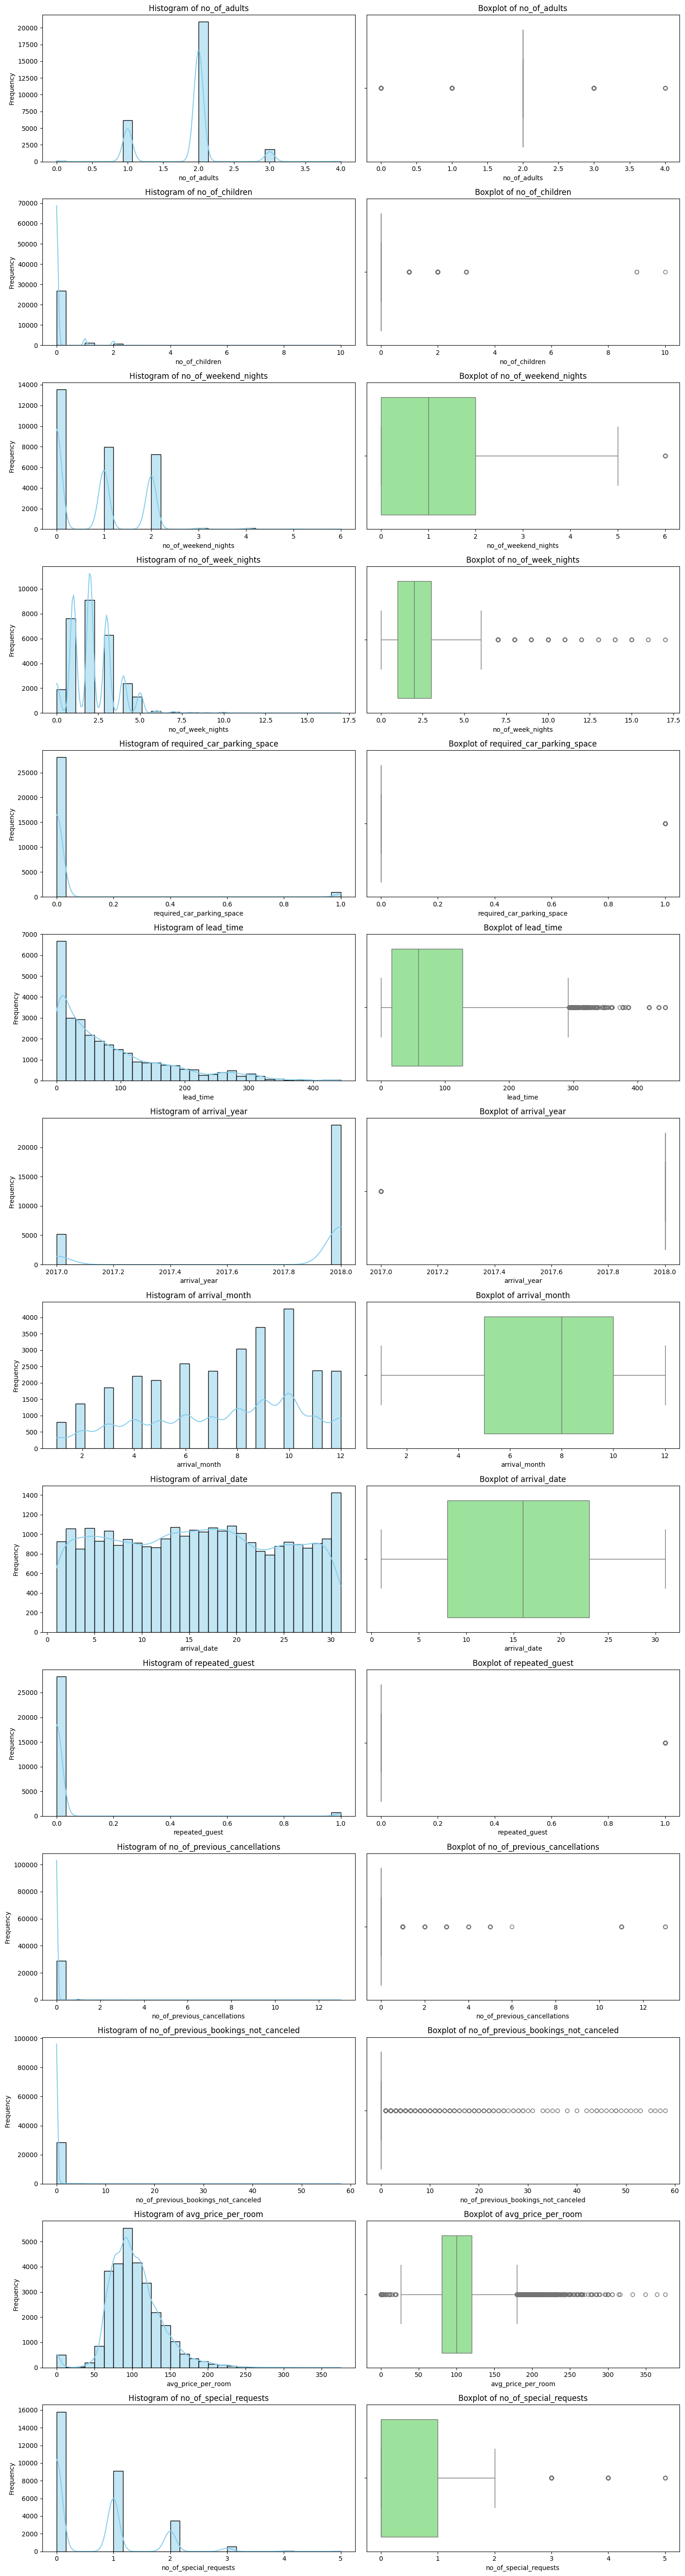

In [354]:
def num_plot_dist(df, num_features, bins=30):
    fig, axes = plt.subplots(len(num_features), 2, figsize=(15, len(num_features) * 4))

    # Ensure axes is always a 2D list even for one feature
    if len(num_features) == 1:
        axes = [axes]

    for i, column in enumerate(num_features):
        # Histogram with better bin control
        sns.histplot(df[column], kde=True, ax=axes[i][0], bins=bins, color="skyblue", edgecolor='black')
        axes[i][0].set_title(f"Histogram of {column}", fontsize=12)
        axes[i][0].set_xlabel(column)
        axes[i][0].set_ylabel("Frequency")

        # Boxplot
        sns.boxplot(x=df[column], ax=axes[i][1], color="lightgreen")
        axes[i][1].set_title(f"Boxplot of {column}", fontsize=12)
        axes[i][1].set_xlabel(column)

    plt.tight_layout()
    plt.show()

# Usage
num_plot_dist(df, numerical_cols, bins=30)  # Adjust bins as needed

##### `Univariate Analysis of Categorical Columns`

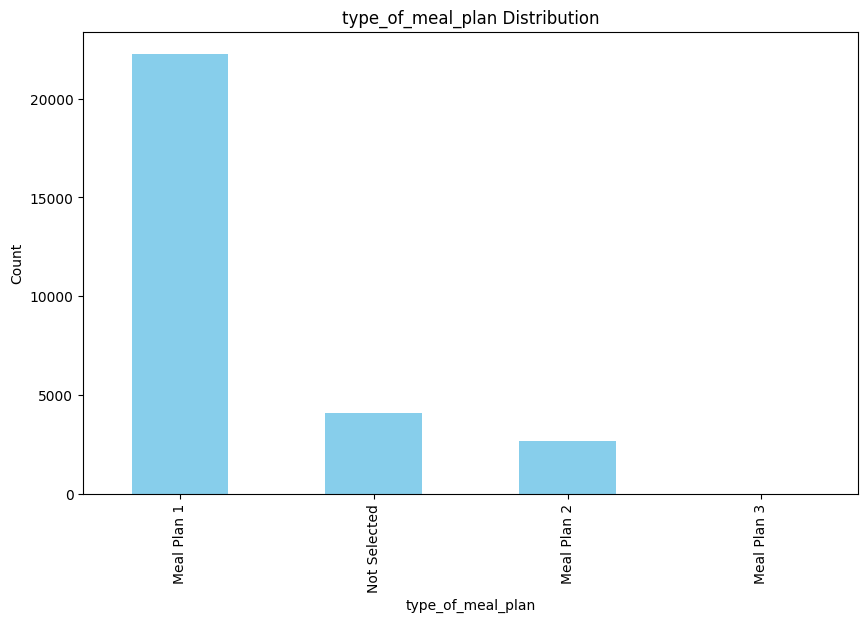

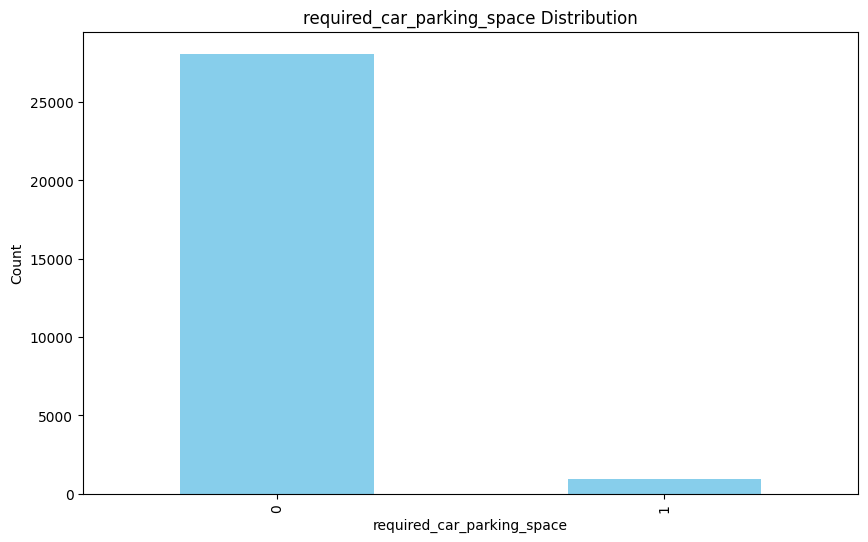

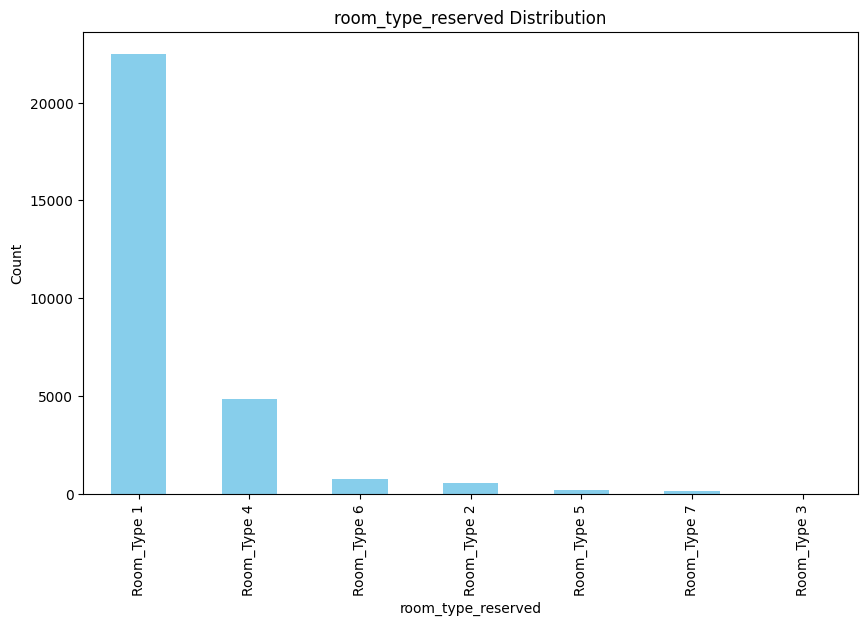

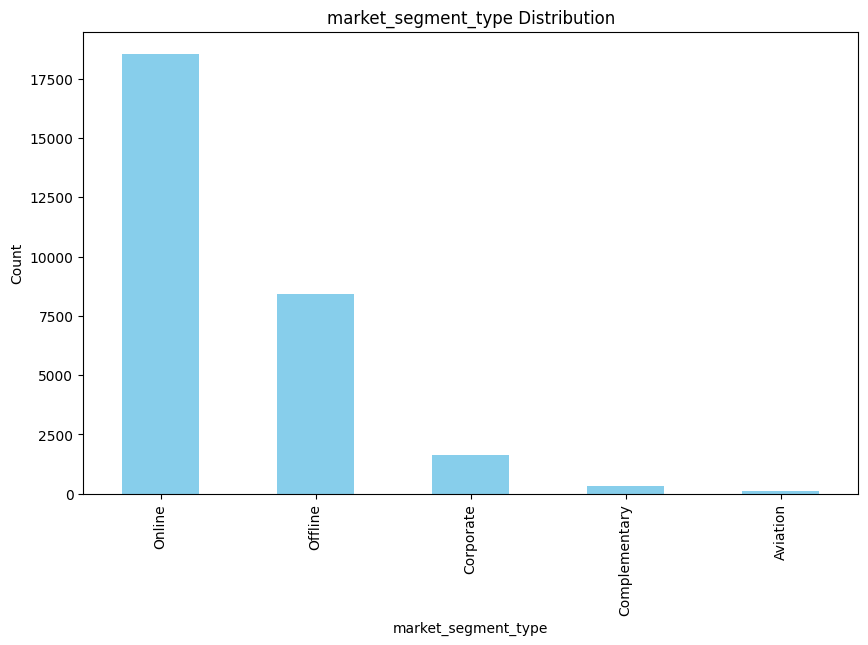

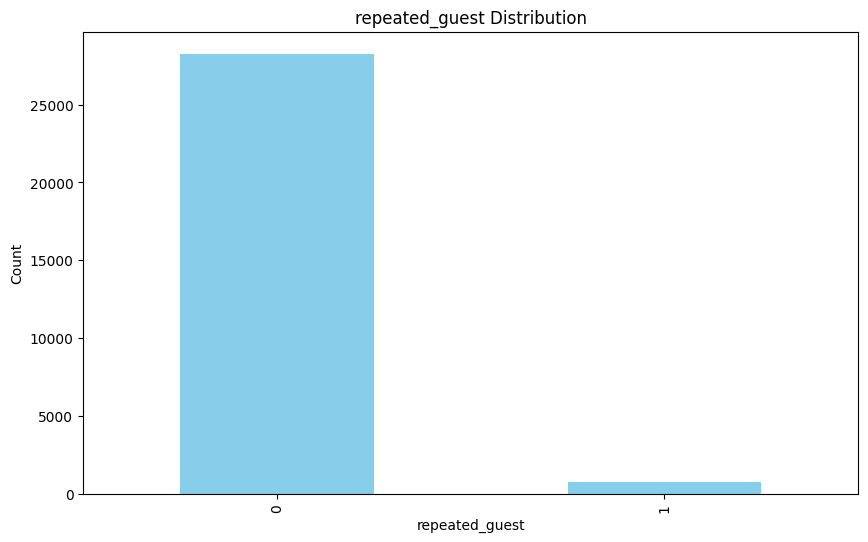

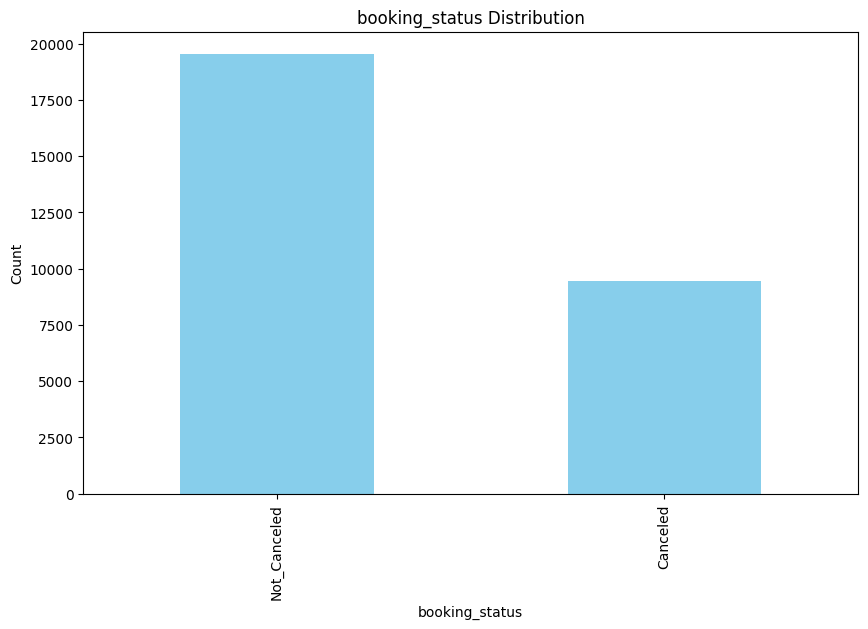

In [355]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10, 6))
    data[cat_feature].value_counts().plot(kind="bar", color="skyblue")
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()

### `Bivariate Analysis for Numerical Columns`

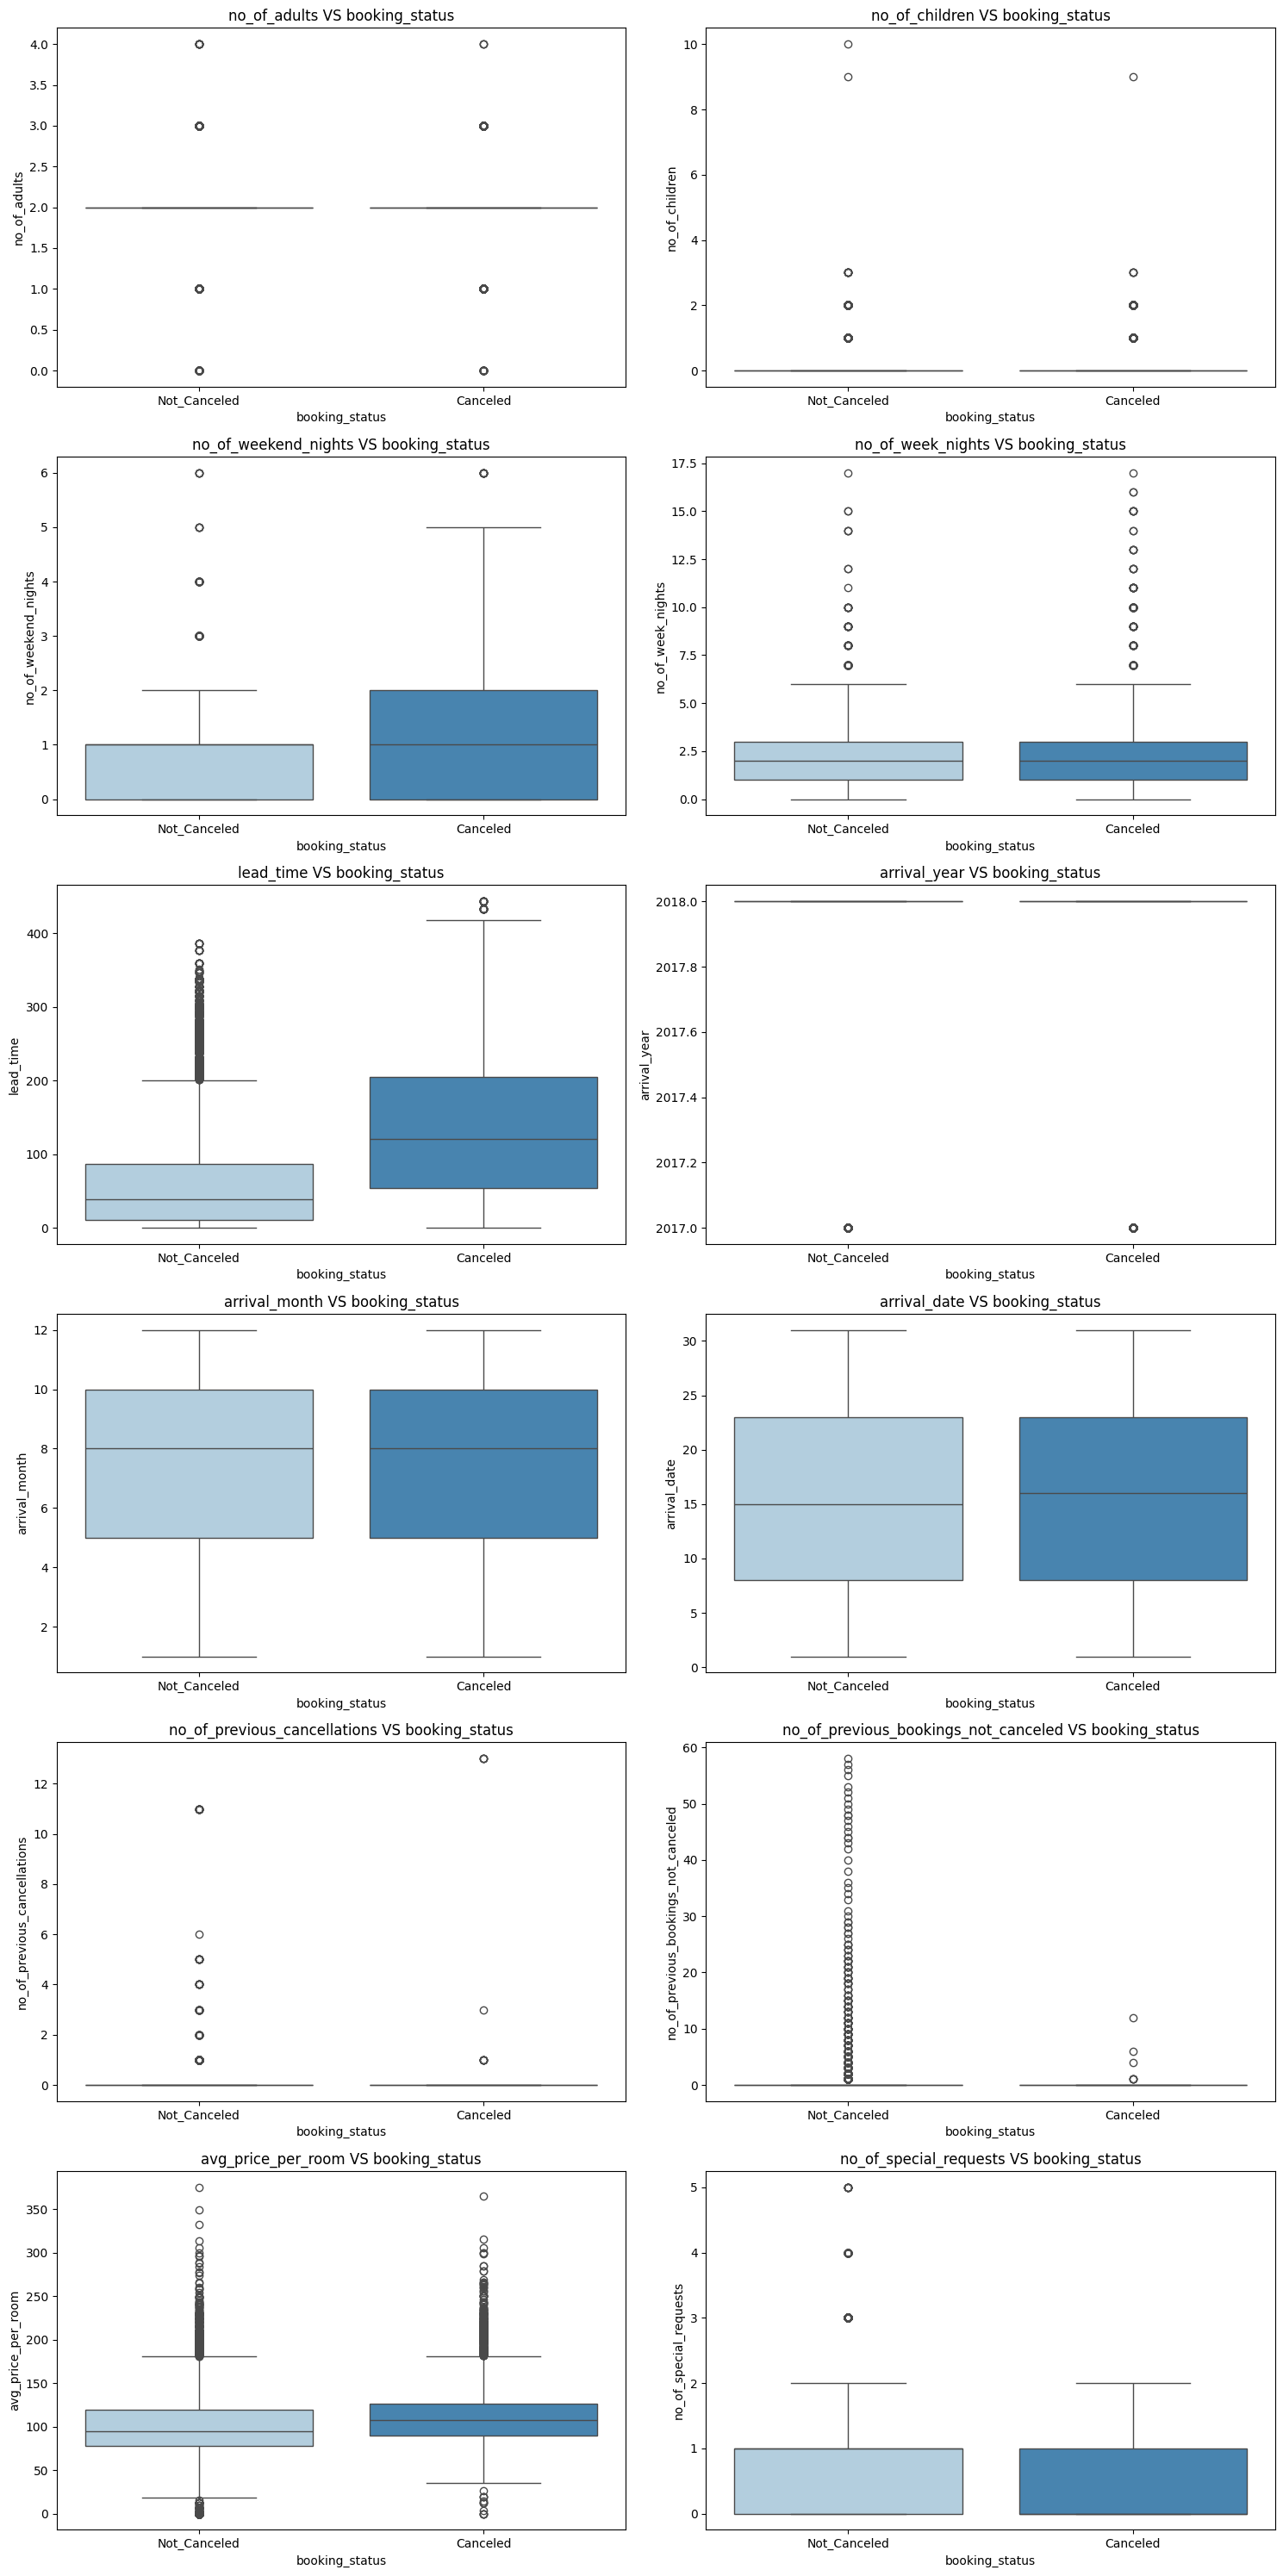

In [356]:
def plot_bivariate_column(df, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
    axes = axes.flatten()

    for i, column in enumerate(num_features):
        sns.boxplot(x=target, y=column, ax=axes[i], data=df, palette="Blues")
        axes[i].set_title(f"{column} VS {target}")

    # If there are any leftover subplots, remove them
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Usage (make sure 'num_cols' is defined)
plot_bivariate_column(df, "booking_status", num_cols)


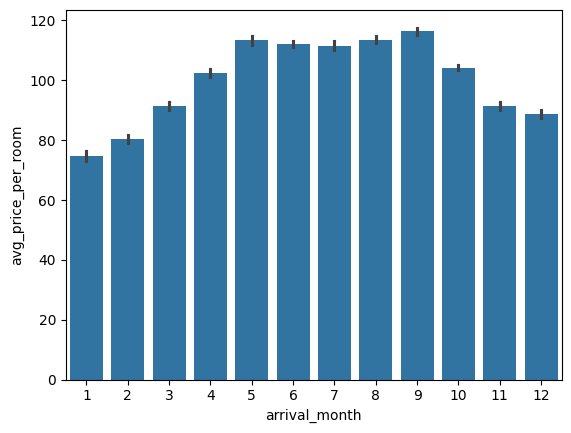

In [357]:
# Barplot between the arrival_month and avg_price_per_column
sns.barplot(x="arrival_month", y="avg_price_per_room", data=data)
plt.show()

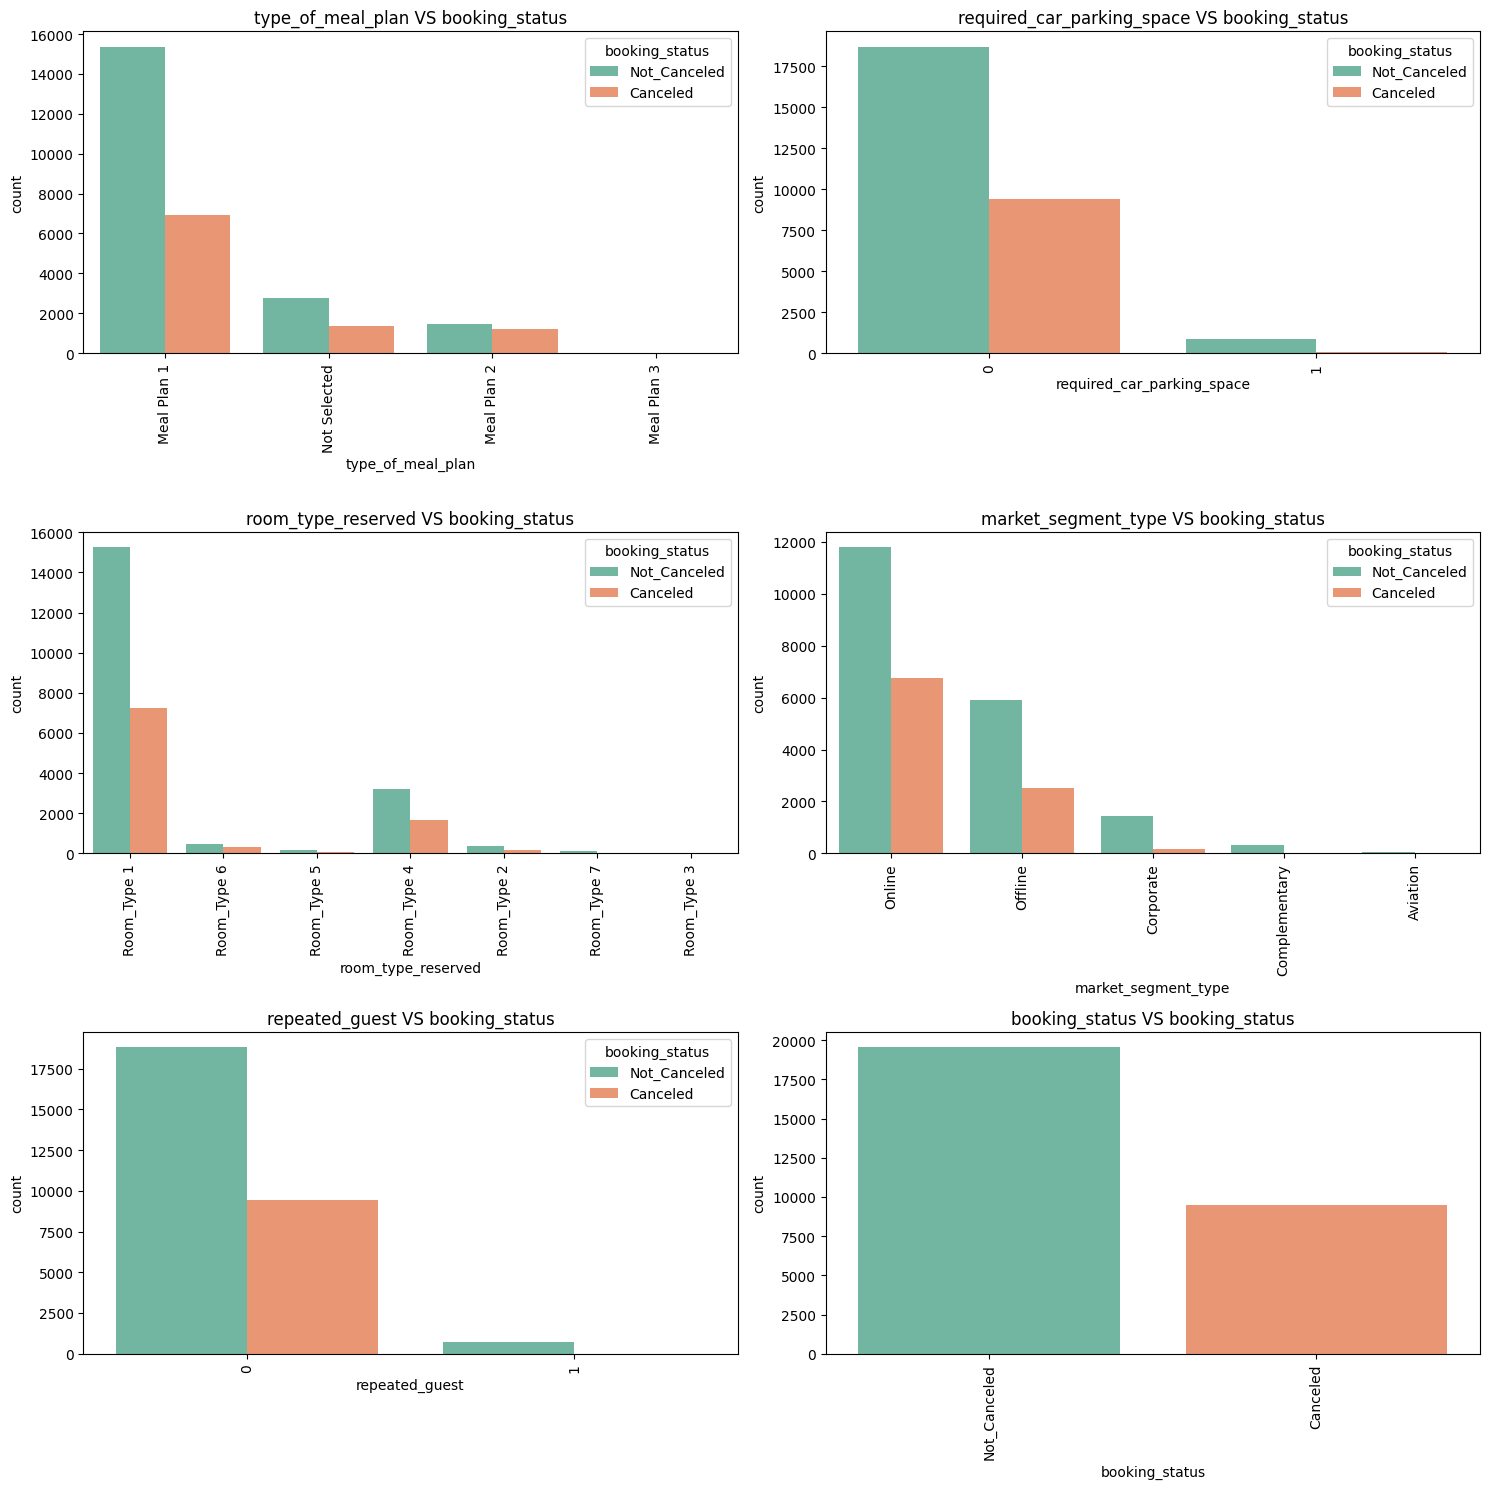

In [358]:
def plot_bivariate_cat(df , target , cat_features):

    num_features = len(cat_features)
    num_rows = (num_features+1)//2

    fig , axes = plt.subplots(num_rows , 2 , figsize=(15 , num_rows*5))
    axes = axes.flatten()

    for i,feature in enumerate(cat_features):
        sns.countplot(x=feature , hue=target ,data=df , palette="Set2" , ax = axes[i])
        axes[i].set_title(f"{feature} VS {target}")
        axes[i].tick_params(axis='x' , rotation=90)

    plt.tight_layout()
    plt.show()

plot_bivariate_cat(data , 'booking_status' , cat_cols)

### **Data Processing**

In [359]:
df.head().reset_index()

,level_0,index,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,1,1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,3,3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,4,4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29020 entries, 0 to 29019
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   index                                 29020 non-null  int64  
 1   no_of_adults                          29020 non-null  int64  
 2   no_of_children                        29020 non-null  int64  
 3   no_of_weekend_nights                  29020 non-null  int64  
 4   no_of_week_nights                     29020 non-null  int64  
 5   type_of_meal_plan                     29020 non-null  object 
 6   required_car_parking_space            29020 non-null  int64  
 7   room_type_reserved                    29020 non-null  object 
 8   lead_time                             29020 non-null  int64  
 9   arrival_year                          29020 non-null  int64  
 10  arrival_month                         29020 non-null  int64  
 11  arrival_date   

In [361]:
'''
# LabelEncoding. 
'''

from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

label_encoder = LabelEncoder()

mappings = {}

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

    mappings[col] = {
        label: code for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))
    }

In [362]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [363]:
df.head()

,index,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29020 entries, 0 to 29019
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   index                                 29020 non-null  int64  
 1   no_of_adults                          29020 non-null  int64  
 2   no_of_children                        29020 non-null  int64  
 3   no_of_weekend_nights                  29020 non-null  int64  
 4   no_of_week_nights                     29020 non-null  int64  
 5   type_of_meal_plan                     29020 non-null  int64  
 6   required_car_parking_space            29020 non-null  int64  
 7   room_type_reserved                    29020 non-null  int64  
 8   lead_time                             29020 non-null  int64  
 9   arrival_year                          29020 non-null  int64  
 10  arrival_month                         29020 non-null  int64  
 11  arrival_date   

#### `Checking for the Multicollinearity`

In [365]:
!pip install statsmodels

`Variance Inflation Factor`:
- VIF is a metric used to detect multicollinearity among independent variables in a regression model.

`What is multicollinearity ?`
- When two or more independent variables in a regression model are highly correlated.
- This can cause problems like:
    
    a. Inflated standard errors,

    b. Unstable coefficient estimates,

    c. Difficulty in interpreting the impact of predictors.

`Why is VIF important ?`
- It helps to identify problematic predictors that can distort your regression model.
- By detecting high VIF, we might consider:
    
    a. Removing variables,

    b. Combining variables,

    c. Applying dimensionality reduction (like PCA).

If we have predictors X1, X2, X3, and:

- X1 has VIF = 1.2 (OK),

- X2 has VIF = 12 (high multicollinearity),

- X3 has VIF = 4.5 (moderate),

Then X2 is likely redundant and might need to be handled.


 `Interpretation of VIF values`
 
| VIF Value      | Interpretation                                |
|----------------|-----------------------------------------------|
| 1              | No correlation with other variables           |
| 1 < VIF < 5    | Moderate correlation, usually acceptable      |
| VIF ≥ 5 or 10  | High correlation, indicates multicollinearity|

In [366]:
# 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Adding an constant to the DataFrame. 
X = add_constant(df)

vif_df = pd.DataFrame()
vif_df['feature'] = X.columns
vif_df['data'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [367]:
vif_df

,feature,data
0,const,3.585996e+07
1,index,1.000594e+00
2,no_of_adults,1.295477e+00
3,no_of_children,1.257759e+00
4,no_of_weekend_nights,1.062324e+00
5,no_of_week_nights,1.086934e+00
6,type_of_meal_plan,1.156003e+00
7,required_car_parking_space,1.036923e+00
8,room_type_reserved,1.530041e+00
9,lead_time,1.440458e+00


- Our dataset does not have any multicollinearity.

In [368]:
# Co-relation matrix. 
corr = df.corr()
corr

,index,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
index,1.000000,-0.009881,0.000479,-0.001417,-0.009478,-0.000928,-0.008224,-0.007199,-0.003994,0.002610,0.002904,0.009952,-0.000460,-0.006740,-0.006050,-0.005608,-0.005777,-0.003910,0.004470
no_of_adults,-0.009881,1.000000,-0.023206,0.105348,0.107088,0.025929,0.012601,0.270178,0.096849,0.076599,0.018676,0.021653,0.311844,-0.193910,-0.047723,-0.119168,0.298806,0.186752,-0.091468
no_of_children,0.000479,-0.023206,1.000000,0.029363,0.027730,-0.085639,0.031156,0.359788,-0.046830,0.049156,-0.003387,0.028185,0.135077,-0.036217,-0.016429,-0.021245,0.339916,0.126538,-0.030347
no_of_weekend_nights,-0.001417,0.105348,0.029363,1.000000,0.170348,-0.027533,-0.034955,0.058160,0.044089,0.052698,-0.011612,0.029413,0.127151,-0.066445,-0.020146,-0.027981,-0.007783,0.059582,-0.056956
no_of_week_nights,-0.009478,0.107088,0.027730,0.170348,1.000000,-0.078791,-0.051730,0.095343,0.154032,0.036798,0.037856,-0.007459,0.111961,-0.097529,-0.029076,-0.044622,0.024255,0.045760,-0.093921
type_of_meal_plan,-0.000928,0.025929,-0.085639,-0.027533,-0.078791,1.000000,-0.015095,-0.208296,-0.064028,0.069515,0.008640,0.005035,0.204802,-0.066835,-0.016406,-0.038117,-0.066362,0.020935,-0.027236
required_car_parking_space,-0.008224,0.012601,0.031156,-0.034955,-0.051730,-0.015095,1.000000,0.036740,-0.069882,0.021166,-0.017233,-0.003162,-0.004110,0.117608,0.026509,0.071711,0.059450,0.091292,0.090892
room_type_reserved,-0.007199,0.270178,0.359788,0.058160,0.095343,-0.208296,0.036740,1.000000,-0.106759,0.105152,-0.004403,0.028684,0.157289,-0.027335,-0.008770,-0.012025,0.472436,0.141985,-0.023396
lead_time,-0.003994,0.096849,-0.046830,0.044089,0.154032,-0.064028,-0.069882,-0.106759,1.000000,0.141433,0.134737,0.002029,-0.008181,-0.138162,-0.045136,-0.078447,-0.064011,-0.101831,-0.434425
arrival_year,0.002610,0.076599,0.049156,0.052698,0.036798,0.069515,0.021166,0.105152,0.141433,1.000000,-0.339353,0.016373,0.149341,-0.017384,0.005358,0.026980,0.176304,0.058387,-0.173351


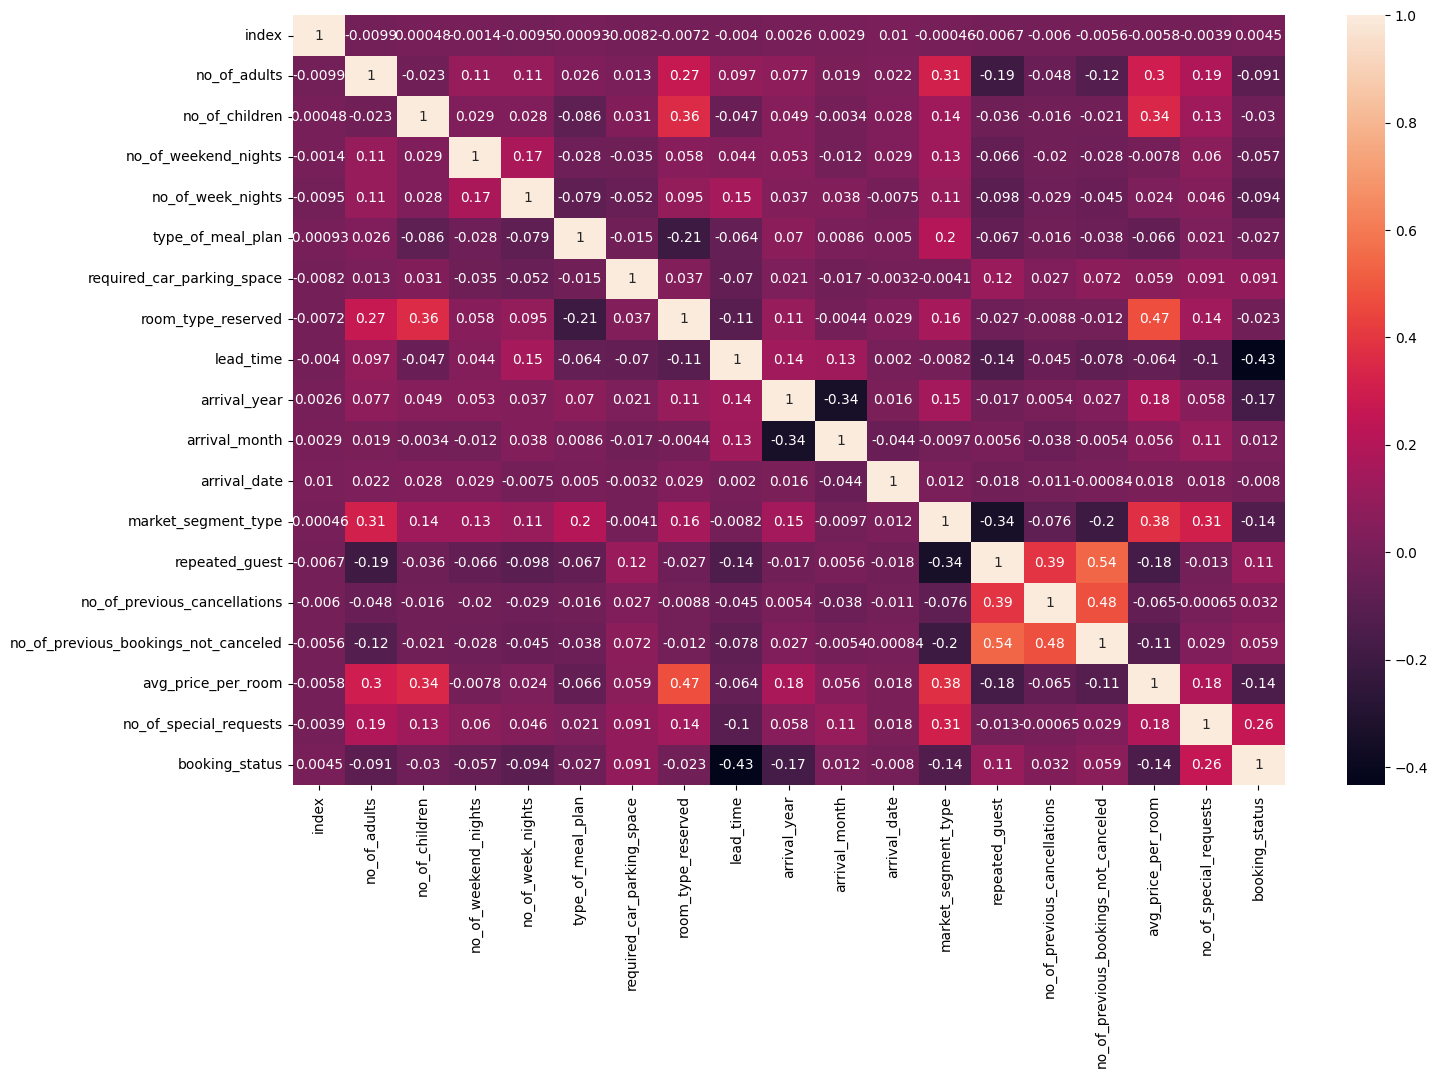

In [369]:
# Visualizing the heatmap.  
def plot_heatmap(df):
    plt.figure(figsize=(16, 10))
    sns.heatmap(df.corr(), annot=True)

plot_heatmap(df)

In [370]:
# Check for the skewness. 
skewness = df.skew()
skewness

index                                    0.000000
no_of_adults                            -0.340838
no_of_children                           4.844412
no_of_weekend_nights                     0.719426
no_of_week_nights                        1.542808
type_of_meal_plan                        1.806612
required_car_parking_space               5.323647
room_type_reserved                       1.729866
lead_time                                1.289144
arrival_year                            -1.669774
arrival_month                           -0.346711
arrival_date                             0.027335
market_segment_type                     -1.670290
repeated_guest                           5.985562
no_of_previous_cancellations            24.940984
no_of_previous_bookings_not_canceled    19.509733
avg_price_per_room                       0.623772
no_of_special_requests                   1.150448
booking_status                          -0.741025
dtype: float64

`Interpretation of skewness values: Measure the symmetric of the data distrbution`:

- Positive skew (e.g., no_of_children = 4.84, required_car_parking_space = 5.32, repeated_guest = 5.98) means long right tails, indicating many small values and few very large ones.

- Negative skew (e.g., arrival_year = -1.67, market_segment_type = -1.67) means long left tails, indicating many large values and few very small ones.

- Extremely high skew (e.g., no_of_previous_cancellations = 24.94, no_of_previous_bookings_not_canceled = 19.51) suggests strongly skewed distributions that may require data transformation for better modeling.

In summary, most features show skewness, so applying transformations like `log` or `Box-Cox` might improve model performance and stability.


In [371]:
import numpy as np

# Implementing the log transformation in order to handle the skewness. 
''' 
# Log_transformation:
- Applies log(x) or log(x + 1) (to handle zeros).
- Reduces right skew by compressing large values.
'''
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])

In [372]:
skewness  = df.skew()
skewness

index                                    0.000000
no_of_adults                            -0.340838
no_of_children                           4.844412
no_of_weekend_nights                     0.719426
no_of_week_nights                        1.542808
type_of_meal_plan                        1.806612
required_car_parking_space               5.323647
room_type_reserved                       1.729866
lead_time                                1.289144
arrival_year                            -1.669774
arrival_month                           -0.346711
arrival_date                             0.027335
market_segment_type                     -1.670290
repeated_guest                           5.985562
no_of_previous_cancellations            14.550045
no_of_previous_bookings_not_canceled     8.897196
avg_price_per_room                       0.623772
no_of_special_requests                   1.150448
booking_status                          -0.741025
dtype: float64

Now, as we can see, the value of skewed got decreased after implementing the `log` transformation.

#### `Handling Imbalanced datasets`

In [373]:
df['booking_status'].value_counts()

booking_status
1    19551
0     9469
Name: count, dtype: int64

In [374]:
# splitting the dataset. 
X = df.drop(columns='booking_status')
y = df['booking_status']

X.columns

Index(['index', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [375]:
y

0        1
1        1
2        0
3        1
4        0
        ..
29015    1
29016    0
29017    1
29018    0
29019    1
Name: booking_status, Length: 29020, dtype: int64

In [376]:
!pip install imbalanced-learn

In [377]:
# Checking class distribution before SMOTE. 
y.value_counts()

booking_status
1    19551
0     9469
Name: count, dtype: int64

In [378]:
# Implementing the SMOTE techniues. 
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_res , y_res = smote.fit_resample(X,y)

In [379]:
y_res.value_counts()

booking_status
1    19551
0    19551
Name: count, dtype: int64

In [380]:
df.shape

(29020, 19)

In [381]:
balanced_df = pd.DataFrame(X_res, columns=X.columns)
balanced_df["booking_status"] = y_res
balanced_df.head()

,index,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,1,2,1,0,0.0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,1,2,1,1,1,0,0.0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,2,0,0,3,0,0.0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,3,2,0,2,5,0,0.0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,4,1,0,0,2,0,0.0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [382]:
balanced_df = balanced_df.drop(columns=['index'])
balanced_df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0.0,0,26,2017,10,17,4,0.0,0.0,0.0,161.000000,0,1
1,2,1,1,1,0,0.0,0,98,2018,7,16,4,0.0,0.0,0.0,121.500000,2,1
2,2,0,0,3,0,0.0,0,433,2018,9,8,3,0.0,0.0,0.0,70.000000,0,0
3,2,0,2,5,0,0.0,0,195,2018,8,8,3,0.0,0.0,0.0,72.250000,0,1
4,1,0,0,2,0,0.0,0,188,2018,6,15,3,0.0,0.0,0.0,130.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39097,2,0,1,1,0,0.0,2,186,2018,9,26,4,0.0,0.0,0.0,110.536606,0,0
39098,2,0,0,1,0,0.0,2,46,2018,5,22,4,0.0,0.0,0.0,123.596178,1,0
39099,1,0,0,3,0,0.0,0,327,2018,10,14,3,0.0,0.0,0.0,65.456191,0,0
39100,2,0,0,2,0,0.0,0,332,2018,10,7,3,0.0,0.0,0.0,98.861586,0,0


In [383]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0.0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0.0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0.0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0.0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0.0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [384]:
balanced_df.shape

(39102, 18)

In [385]:
df = balanced_df.copy()
df.shape

(39102, 18)

### 5. Feature Engineering/Feature selection

    a. Create new features from existing data
    b. Normalize / scale features
    c. Encode categorical variables (label, one-hot, etc.)
    d. Dimensionality reduction (PCA, UMAP)
    e. Text/numeric/time series transformations

In [386]:
len(df.columns)

18

In [387]:
# Implementing the Random Forest For the Feature selection. 
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns="booking_status")
y = df["booking_status"]

model = RandomForestClassifier(random_state=42)
model

RandomForestClassifier(random_state=42)

In [388]:
model.fit(X, y)

model.feature_importances_

array([0.02156558, 0.00586082, 0.03186496, 0.043415  , 0.02489367,
       0.00858483, 0.02171778, 0.29549967, 0.01889178, 0.09398139,
       0.07974086, 0.04655014, 0.00449545, 0.00049127, 0.00182196,
       0.1524151 , 0.14820971])

In [389]:
feature_importance = model.feature_importances_

feature_importance = pd.DataFrame({
    "feature": X.columns, 
    "importance": feature_importance
})

top_importance_feature_df = feature_importance.sort_values(by="importance", ascending=False)
top_importance_feature_df

,feature,importance
7,lead_time,0.295500
15,avg_price_per_room,0.152415
16,no_of_special_requests,0.148210
9,arrival_month,0.093981
10,arrival_date,0.079741
11,market_segment_type,0.046550
3,no_of_week_nights,0.043415
2,no_of_weekend_nights,0.031865
4,type_of_meal_plan,0.024894
6,room_type_reserved,0.021718


In [390]:
top_10_features = top_importance_feature_df["feature"].head(10).values
top_10_df = df[top_10_features.tolist() + ["booking_status"]]
top_10_df

,lead_time,avg_price_per_room,no_of_special_requests,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,26,161.000000,0,10,17,4,1,2,0,0,1
1,98,121.500000,2,7,16,4,1,1,0,0,1
2,433,70.000000,0,9,8,3,3,0,0,0,0
3,195,72.250000,0,8,8,3,5,2,0,0,1
4,188,130.000000,0,6,15,3,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
39097,186,110.536606,0,9,26,4,1,1,0,2,0
39098,46,123.596178,1,5,22,4,1,0,0,2,0
39099,327,65.456191,0,10,14,3,3,0,0,0,0
39100,332,98.861586,0,10,7,3,2,0,0,0,0


In [391]:
len(top_10_df.columns)

11

In [392]:
df = top_10_df.copy()
df

,lead_time,avg_price_per_room,no_of_special_requests,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,26,161.000000,0,10,17,4,1,2,0,0,1
1,98,121.500000,2,7,16,4,1,1,0,0,1
2,433,70.000000,0,9,8,3,3,0,0,0,0
3,195,72.250000,0,8,8,3,5,2,0,0,1
4,188,130.000000,0,6,15,3,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
39097,186,110.536606,0,9,26,4,1,1,0,2,0
39098,46,123.596178,1,5,22,4,1,0,0,2,0
39099,327,65.456191,0,10,14,3,3,0,0,0,0
39100,332,98.861586,0,10,7,3,2,0,0,0,0


## **Model Selection**

In [393]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [394]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [401]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [402]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [403]:
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Classifier": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGboost": XGBClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "LGBM": LGBMClassifier(random_state=42)
}

In [404]:
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 score": []
}

In [405]:
# Training models. 
for model_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = recall_score(y_test, y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 score"].append(f1)

[LightGBM] [Info] Number of positive: 15649, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000917 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 598
[LightGBM] [Info] Number of data points in the train set: 31281, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500272 -> initscore=0.001087
[LightGBM] [Info] Start training from score 0.001087


In [406]:
metrics_df = pd.DataFrame(metrics)
metrics_df

,Model,Accuracy,Precision,Recall,F1 score
0,Random Forest,0.905511,0.899066,0.913121,0.913121
1,LogisticRegression,0.777778,0.809143,0.725782,0.725782
2,Gradient Boosting,0.852065,0.850933,0.852896,0.852896
3,Support Vector Classifier,0.727528,0.720988,0.740390,0.740390
4,Decision Tree,0.859609,0.855838,0.864172,0.864172
5,KNN,0.790308,0.796073,0.779344,0.779344
6,Naive Bayes,0.761028,0.773179,0.737314,0.737314
7,XGboost,0.889784,0.880190,0.901845,0.901845
8,AdaBoost,0.801688,0.824455,0.765505,0.765505
9,LGBM,0.885437,0.873695,0.900564,0.900564


In [407]:
''' 
# SELECTING RANDOM FOREST MODEL. 
'''
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

X = df.drop(columns="booking_status")
y = df["booking_status"]

X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

rf = RandomForestClassifier(random_state=42)

params_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 50), 
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    estimator = rf, 
    param_distributions = params_dist,
    n_iter = 5,
    cv = 5, 
    verbose = 1, 
    random_state = 42, 
    scoring = "accuracy"
)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x16faffd90>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x31656ef20>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x31656fb60>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x310148d70>},
                   random_state=42, scoring='accuracy', verbose=1)

In [408]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [409]:
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

In [410]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = recall_score(y_test, y_pred)

In [411]:
accuracy

0.9038486127093722

In [412]:
precision

0.8931602596105841

In [413]:
recall

0.9169656586365966

In [414]:
f1

0.9169656586365966

In [415]:
'''save the model with joblib.'''
import joblib
joblib.dump(best_rf_model, "random_forest.pkl")

['random_forest.pkl']

In [416]:
# Loading the model for prediction. 
loaded_model = joblib.load("random_forest.pkl")

new_data = np.array([190,1 ,	93.5,	9	,8,	4,	5,	2,	0,	0]).reshape(1,-1)

prediction = loaded_model.predict(new_data)
prediction

array([1])